In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib 
from flask import Flask , request, render_template
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv("student_info.csv")

In [78]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [79]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [80]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [81]:
df.columns


Index(['study_hours', 'student_marks'], dtype='object')

In [82]:
df.shape


(200, 2)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [84]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [85]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

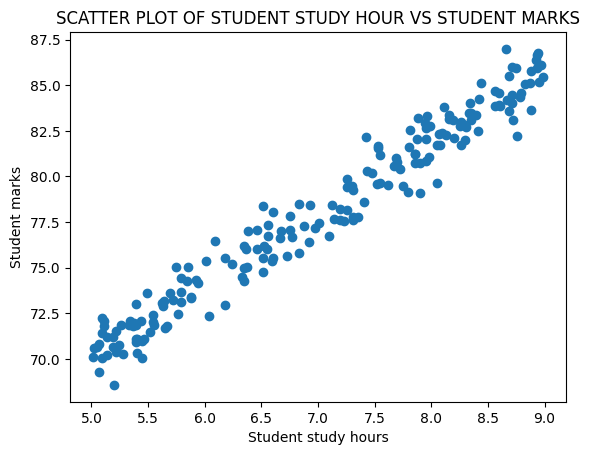

In [86]:
plt.scatter(data=df, x='study_hours', y="student_marks")
plt.xlabel("Student study hours")
plt.ylabel("Student marks")
plt.title("SCATTER PLOT OF STUDENT STUDY HOUR VS STUDENT MARKS")
plt.show()

In [87]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [88]:
df1=df.fillna(df.mean())

In [89]:
df1


,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [91]:
df1.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


In [92]:
df1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [93]:
X= df1.drop("student_marks",axis=1)
y= df1.drop("study_hours",axis=1)
print("shape of X=",X.shape)
print("shape of y=",y.shape)

shape of X= (200, 1)
shape of y= (200, 1)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [95]:
print("shape of X_train=",X_train.shape)
print("shape of X_test=",X_test.shape)
print("shape of y_train=",y_train.shape)
print("shape of y_test=",y_test.shape)

shape of X_train= (160, 1)
shape of X_test= (40, 1)
shape of y_train= (160, 1)
shape of y_test= (40, 1)


In [96]:
lr = LinearRegression()

In [97]:
lr

LinearRegression()

In [98]:
lr.fit(X_train,y_train)

LinearRegression()

In [99]:
lr.coef_

array([[3.93037294]])

In [100]:
lr.intercept_

array([50.45063632])

In [101]:
y_pred=lr.predict(X_test)
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [102]:
m=3.93
c=50.44
y=m*11+c
y

93.67

In [103]:
lr.predict([[11]])*10

array([[936.84738614]])

In [104]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=["study_hours", "student_marks_original", "student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


In [105]:
lr

LinearRegression()

In [106]:
joblib.dump(lr,"student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [107]:
pwd

'I:\\Linear_regression'

In [108]:
model = joblib.load("student_mark_predictor.pkl")

In [109]:
pwd

'I:\\Linear_regression'